In [20]:
using Revise
using Laplacians
using Pkg
@show Pkg.pathof(Laplacians)
using SparseArrays
using LinearAlgebra

using Dates


Pkg.pathof(Laplacians) = "/Users/rjkyng/Dropbox/Repos/Laplacians.jl/src/Laplacians.jl"


In [4]:
using PyPlot

┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = top-level scope at none:0
└ @ Core none:0


In [2]:
using MATLAB

In [9]:
maxits = 10000
tol = 1e-8

1.0e-8

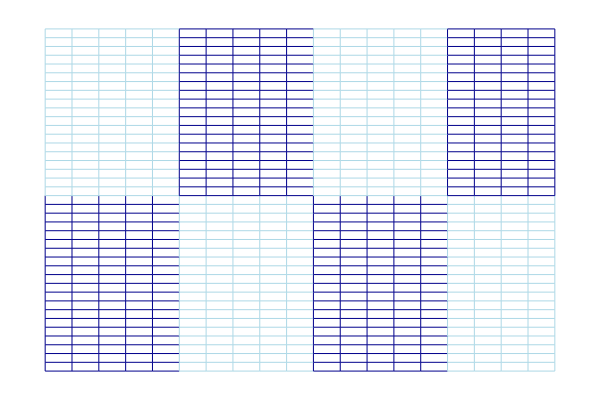

  0.000201 seconds (36 allocations: 190.625 KiB)
  0.000029 seconds (16 allocations: 99.406 KiB)
  0.000074 seconds (28 allocations: 52.789 KiB)
  0.000039 seconds (11 allocations: 63.984 KiB)


In [7]:
s1 = 20
s2 = 40
n = s1*s2
weight = 1e6
blocks1 = 4
blocks2 = 2
@time A = ggrid2_checkered(s1,s2,blocks1,blocks2,weight) # create the adjacency matrix
(x,y) = ggrid2coords(s1,s2);
p = plot_graph_weighted(A,x,y;dots=false);
@time L = lap(A) # create the Laplacian
bot = 1:s1
top = n-s1+1:n
left = s1+1:s1:n-s1
right = 2*s1:s1:n-1
bndry = [bot; top; left; right]
@time int = setdiff(1:n,bndry) # the interior variables (= all - boundary )

@time M = L[int,int]
# remove the rows and colums corresponding to the boundary of the grid
# -- this is because we essentially want to force boundary voltages to be zero

ni = length(int) #this is the remaining variables

b = randn(ni);

In [29]:
hypretestdir = "/Users/rjkyng/Dropbox/Repos/hypre-test"
cd(hypretestdir)
pwd()

"/Users/rjkyng/Dropbox/Repos/hypre-test"

In [35]:
    mf = MatFile("julia2matlab2hypre_vector.mat","w")
    put_variable(mf, "M", M)
    put_variable(mf, "b", b)
    put_variable(mf, "tol", tol)
    put_variable(mf, "maxits", maxits)
    put_variable(mf, "num_procs", 2)
    put_variable(mf, "output_filename", "atestvectorfile.mat")
    close(mf)

In [21]:
limit = 30


lapdir = dirname(pathof(Laplacians))
    
    fn = "$(hypretestdir)/matlab/matlab2hypreParVectorsScript.m"
    mat = ENV["MATLAB_HOME"]
    matlab = "$(mat)/bin/matlab"
    cmd = `gtimeout $(limit) $(matlab) -nojvm \< $(fn)`

    t0 = now()

    bt = Inf
    st = Inf
    err = Inf
    iter = Inf
    start = -Inf

    try
        run(cmd)
    catch e
        errtrace = backtrace()
        msg = sprint(showerror, e, errtrace)
        println(msg)
        println("Matlab Died")
    end



                            < M A T L A B (R) >
                  Copyright 1984-2018 The MathWorks, Inc.
                   R2018b (9.5.0.944444) 64-bit (maci64)
                              August 28, 2018

 
For online documentation, see https://www.mathworks.com/support
For product information, visit www.mathworks.com.
 
>> >> >> >> >> >> >> >> >> >> >> >> >> >> >> 

{Undefined function or variable 'la'.
} 
{Undefined function or variable 'la'.
} 


>> >> >> >> >> 

In [31]:
limit = 30


lapdir = dirname(pathof(Laplacians))
    
    fn = "$(hypretestdir)/matlab/matlab2hypreParVectorsScript.m"
    mat = ENV["MATLAB_HOME"]
    matlab = "$(mat)/bin/matlab"
    cmd = `gtimeout $(limit) $(matlab) -nojvm \< $(fn)`


`gtimeout 30 /Applications/MATLAB_R2018b.app/bin/matlab -nojvm '<' /Users/rjkyng/Dropbox/Repos/hypre-test/matlab/matlab2hypreParVectorsScript.m`

In [38]:
    mf = MatFile("julia2matlab2hypre_matrix.mat","w")
    put_variable(mf, "A", M)
    put_variable(mf, "b", b)
    put_variable(mf, "tol", tol)
    put_variable(mf, "maxits", maxits)
    put_variable(mf, "num_procs", 2)
    put_variable(mf, "output_filename", "hypreMatrixTestOut")
    close(mf)

In [39]:
pwd()

"/Users/rjkyng/Dropbox/Repos/hypre-test"